# Test the sign of the differential phase measured using CWT cross spectra

In [20]:
# Import
from numpy import angle, array, cos, linspace, pi
from pywt import wavelist, scale2frequency, cwt
from matplotlib.pyplot import subplots

from utils_wavelet import get_scales_and_freqs, power2db
from utils_plot import add_phase_colorbar

In [21]:
# Inputs
## Input signals
begin = 0.0
end = 1.0
sampling_rate = 1000.0
freq = 100.0

## Wavelet transform
wavelet = 'cmor'
center_freq = 2.0
bandwidth = 20.0
min_scale = 10
max_scale = 100


In [22]:
# Generate the signals
numpts = round((end - begin) * sampling_rate) + 1
timeax = linspace(begin, end, numpts)

signal1 = cos(2.0 * pi * freq * timeax)
signal2 = cos(2.0 * pi * freq * timeax + pi / 2)
signal3 = cos(2.0 * pi * freq * timeax - pi / 2) 

In [23]:
# Compute the CWT
scales, freqs = get_scales_and_freqs(wavelet, bandwidth, center_freq, min_scale, max_scale, sampling_rate=sampling_rate)
wavelet = f"{wavelet}{bandwidth}-{center_freq}"
spec1, _ = cwt(signal1, scales, wavelet, sampling_period=1.0 / sampling_rate)
spec2, _ = cwt(signal2, scales, wavelet, sampling_period=1.0 / sampling_rate)
spec3, _ = cwt(signal3, scales, wavelet, sampling_period=1.0 / sampling_rate)


In [24]:
# Compute the cross spectra
cross_spec12 = spec1 * spec2.conj()
cross_spec13 = spec1 * spec3.conj()

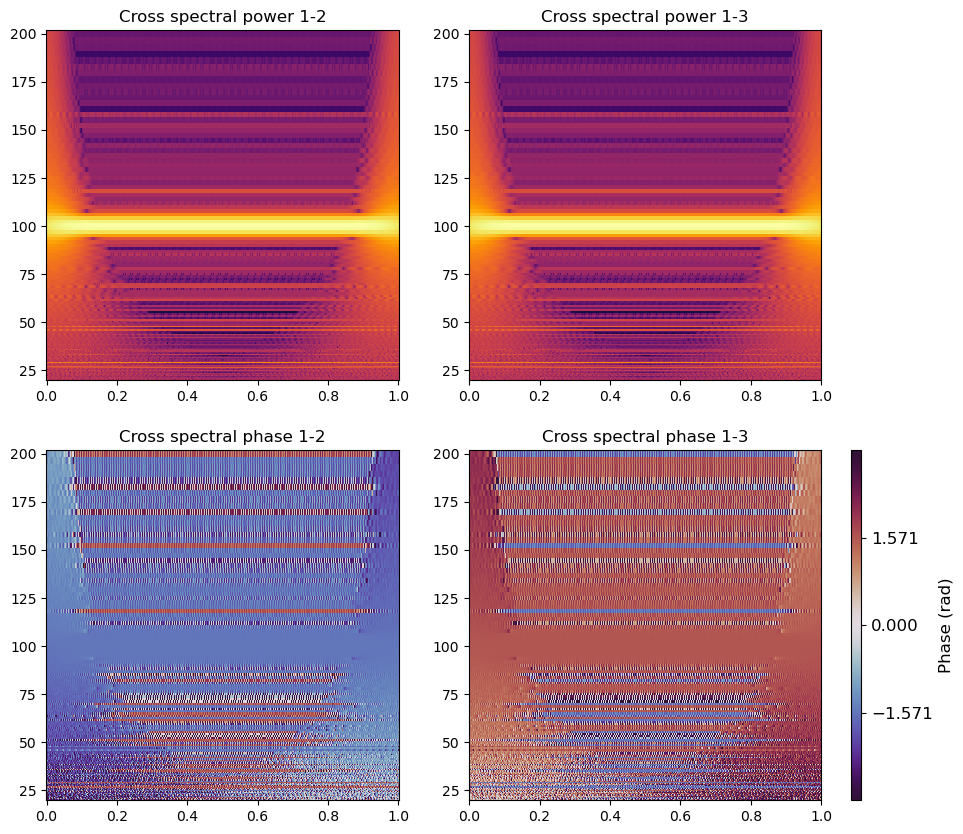

In [26]:
# Plot the cross spectral power and phase
power_12 = power2db(abs(cross_spec12) ** 2)
power_13 = power2db(abs(cross_spec13) ** 2)

phase_12 = angle(cross_spec12)
phase_13 = angle(cross_spec13)

fig, axes = subplots(2, 2, figsize=(10, 10))

ax = axes[0, 0]
power_color = ax.pcolormesh(timeax, freqs, power_12, cmap="inferno")
ax.set_title("Cross spectral power 1-2")

ax = axes[0, 1]
power_color = ax.pcolormesh(timeax, freqs, power_13, cmap="inferno")
ax.set_title("Cross spectral power 1-3")

ax = axes[1, 0]
phase_color = ax.pcolormesh(timeax, freqs, phase_12, cmap="twilight_shifted")
ax.set_title("Cross spectral phase 1-2")

ax = axes[1, 1]
phase_color = ax.pcolormesh(timeax, freqs, phase_13, cmap="twilight_shifted")
ax.set_title("Cross spectral phase 1-3")

bbox = ax.get_position()
position = [bbox.x0 + bbox.width + 0.03, bbox.y0, 0.01, bbox.height]
add_phase_colorbar(fig, phase_color, position, orientation="vertical")
